Pokemon GO Trainer Stat Model

In [21]:
# Introduction and Setup
# This section imports necessary libraries and loads the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('trainingdata.csv', header=None, names=['trainername', 'level', 'battleswon', 'distancewalked', 'pokemoncaught'])

print(df.shape)

(390, 5)


In [22]:
# Data Cleaning - Outlier Removal 1.0
# Here we define a function to remove outliers using the IQR method and apply it

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in ['level', 'battleswon', 'distancewalked', 'pokemoncaught']:
    df = remove_outliers(df, column)

print(f"Dataset size after removing outliers: {df.shape}")

Dataset size after removing outliers: (280, 5)


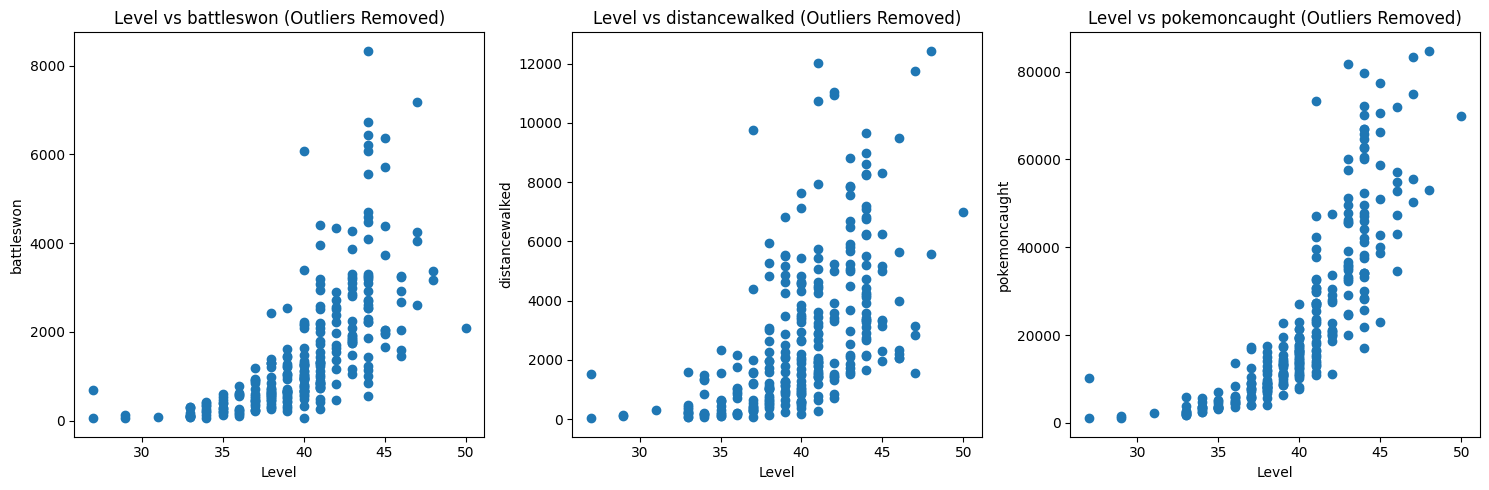

In [23]:
# Data Visualization
# Visualize the relationships between level and other variables after outlier removal

plt.figure(figsize=(15, 5))
for i, column in enumerate(['battleswon', 'distancewalked', 'pokemoncaught'], 1):
    plt.subplot(1, 3, i)
    plt.scatter(df['level'], df[column])
    plt.xlabel('Level')
    plt.ylabel(column)
    plt.title(f'Level vs {column} (Outliers Removed)')
plt.tight_layout()
plt.show()

In [24]:
# Model Preparation and Training
# Prepare data for modeling, split into training and testing sets, train models

X = df[['level']]
y_battles = df['battleswon']
y_distance = df['distancewalked']
y_pokemon = df['pokemoncaught']

X_train, X_test, y_train_battles, y_test_battles = train_test_split(X, y_battles, test_size=0.2, random_state=42)
_, _, y_train_distance, y_test_distance = train_test_split(X, y_distance, test_size=0.2, random_state=42)
_, _, y_train_pokemon, y_test_pokemon = train_test_split(X, y_pokemon, test_size=0.2, random_state=42)

# Train models
model_battles = LinearRegression().fit(X_train, y_train_battles)
model_distance = LinearRegression().fit(X_train, y_train_distance)
model_pokemon = LinearRegression().fit(X_train, y_train_pokemon)

In [25]:
# Model Evaluation
# Evaluate the performance of each model

y_pred_battles = model_battles.predict(X_test)
y_pred_distance = model_distance.predict(X_test)
y_pred_pokemon = model_pokemon.predict(X_test)

print("Battles Won Model:")
print(f"R-squared: {r2_score(y_test_battles, y_pred_battles):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_battles, y_pred_battles):.3f}")

print("\nDistance Walked Model:")
print(f"R-squared: {r2_score(y_test_distance, y_pred_distance):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_distance, y_pred_distance):.3f}")

print("\nPokémon Caught Model:")
print(f"R-squared: {r2_score(y_test_pokemon, y_pred_pokemon):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_pokemon, y_pred_pokemon):.3f}")

Battles Won Model:
R-squared: 0.483
Mean Squared Error: 1020514.397

Distance Walked Model:
R-squared: 0.438
Mean Squared Error: 2715245.238

Pokémon Caught Model:
R-squared: 0.747
Mean Squared Error: 89427440.204


In [26]:
# Predictions
# Show predictions for a new level

new_level = pd.DataFrame({'level': [35]})
print("\nPredictions for level 35:")
print(f"Battles Won: {model_battles.predict(new_level)[0]:.2f}")
print(f"Distance Walked: {model_distance.predict(new_level)[0]:.2f}")
print(f"Pokémon Caught: {model_pokemon.predict(new_level)[0]:.2f}")


Predictions for level 35:
Battles Won: 325.68
Distance Walked: 1030.55
Pokémon Caught: 2854.13


In [27]:
# Generate CSV Data for Visualization

# Create a DataFrame for levels 35 to 50
levels = pd.DataFrame({'level': range(35, 51)})

# Predict for each model
predictions_battles = model_battles.predict(levels[['level']])
predictions_distance = model_distance.predict(levels[['level']])
predictions_pokemon = model_pokemon.predict(levels[['level']])

# Combine predictions into a single DataFrame
predictions_df = pd.DataFrame({
    'Level': levels['level'],
    'Battles Won': predictions_battles,
    'Distance Walked': predictions_distance,
    'Pokémon Caught': predictions_pokemon
})

# Round the predictions to 2 decimal places for readability
predictions_df = predictions_df.round(2)

# Display the predictions table
print(predictions_df)

# Optionally, if you want to save this to a CSV file
predictions_df.to_csv('predictions_level_35_to_50.csv', index=False)

    Level  Battles Won  Distance Walked  Pokémon Caught
0      35       325.68          1030.55         2854.13
1      36       575.05          1409.12         6938.42
2      37       824.43          1787.69        11022.70
3      38      1073.80          2166.27        15106.99
4      39      1323.18          2544.84        19191.28
5      40      1572.55          2923.41        23275.56
6      41      1821.93          3301.98        27359.85
7      42      2071.30          3680.55        31444.13
8      43      2320.67          4059.12        35528.42
9      44      2570.05          4437.69        39612.70
10     45      2819.42          4816.26        43696.99
11     46      3068.80          5194.83        47781.27
12     47      3318.17          5573.40        51865.56
13     48      3567.55          5951.97        55949.84
14     49      3816.92          6330.54        60034.13
15     50      4066.30          6709.11        64118.41


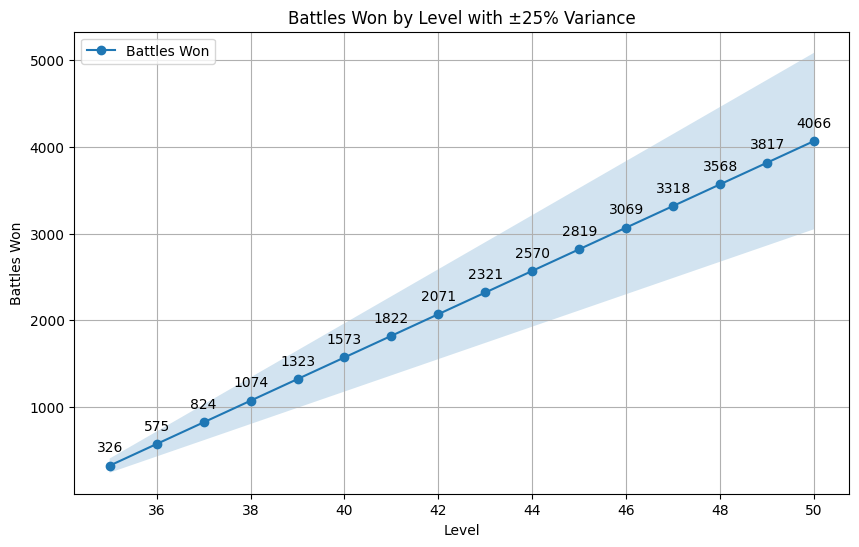

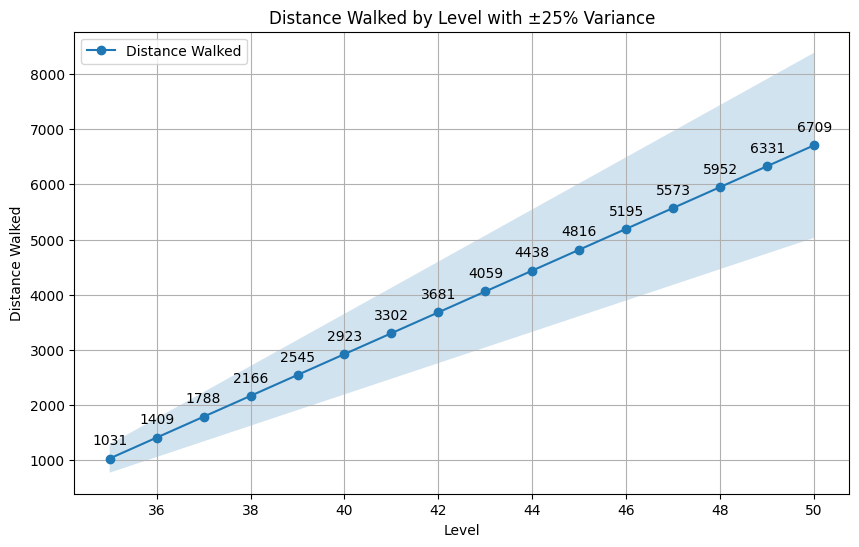

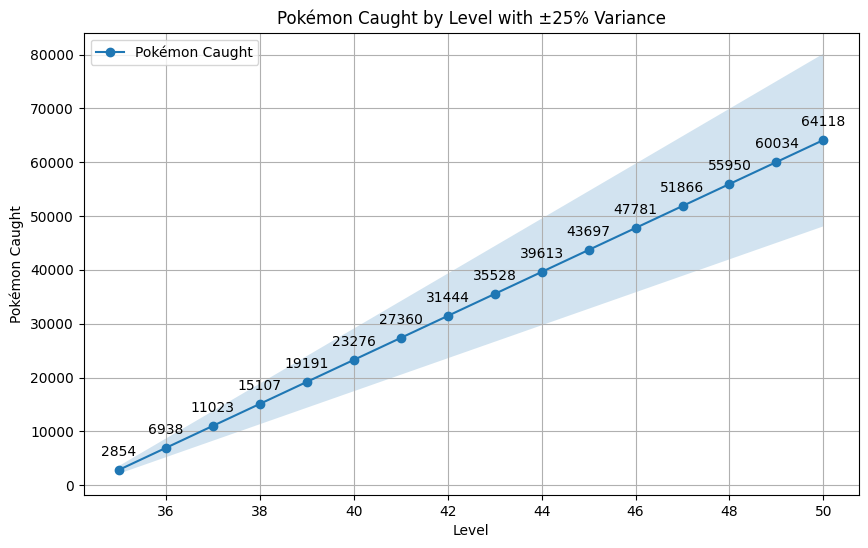

In [28]:
# Visualization of Data using 25% +/- variance 

df = pd.read_csv('predictions_level_35_to_50.csv')

# Function to create a graph with 25% variance
def plot_with_variance(df, column_name, title):
    plt.figure(figsize=(10, 6))
    
    # Plotting the actual data with markers
    plt.plot(df['Level'], df[column_name], label=column_name, marker='o')
    
    # Calculate 25% variance
    upper_bound = df[column_name] * 1.25
    lower_bound = df[column_name] * 0.75
    
    # Fill the area between upper and lower bounds
    plt.fill_between(df['Level'], lower_bound, upper_bound, alpha=0.2)
    
    # Add data point markers with values
    for i, row in df.iterrows():
        plt.annotate(f'{row[column_name]:.0f}', (row['Level'], row[column_name]), 
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

    plt.title(title)
    plt.xlabel('Level')
    plt.ylabel(column_name)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting each variable
plot_with_variance(df, 'Battles Won', 'Battles Won by Level with ±25% Variance')
plot_with_variance(df, 'Distance Walked', 'Distance Walked by Level with ±25% Variance')
plot_with_variance(df, 'Pokémon Caught', 'Pokémon Caught by Level with ±25% Variance')